In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm as norm
%matplotlib inline

In [3]:
ses = np.random.randn(10,3) #some example signal strengths...

In [4]:
#to check that by integrating p(signal_strengths | attenuation) p(attenuation) and normalising we get the same as
#if we find the point along the [1,1,1] vector that passes though the signal_strength point, and compute the prob
#density of a standard 2d normal is the same...

#integrating numerically
totals = np.zeros(10)
t = np.array([0,2,3])
for p in np.linspace(-20,30,5000):
    totals+=mvn.pdf(ses,p+t,np.eye(3))
totals/=np.sum(totals)

In [5]:
totals

array([0.07853166, 0.01105865, 0.02917771, 0.08565419, 0.01156133,
       0.61319689, 0.02966365, 0.00292804, 0.13383881, 0.00438906])

In [6]:
#analytic solution...

v = np.ones(3)/np.sqrt(3)
dist = np.linalg.norm((v*((ses-t)@v)[:,None]+t)-ses,axis=1)
ps = norm(0,1).pdf(dist)
ps/=np.sum(ps)
ps

array([0.07853166, 0.01105865, 0.02917771, 0.08565419, 0.01156133,
       0.61319689, 0.02966365, 0.00292804, 0.13383881, 0.00438906])

# Demo

In [7]:
def getsignalstrength(transmitter_angle, antenna_offset, attenuation):
    """
    Compute synthetic signal strength (for given angle and local offset, for given attenuation)
    """
    if not isinstance(transmitter_angle, np.ndarray): transmitter_angle = np.array([transmitter_angle])
    if not isinstance(antenna_offset, np.ndarray): antenna_offset = np.array([antenna_offset])

    ang = (transmitter_angle[:,None]-antenna_offset[None,:]+np.pi)%(np.pi*2)-np.pi
    s = 20*np.abs(np.cos(3*ang)**2*np.exp(-ang**2))-attenuation
    return s

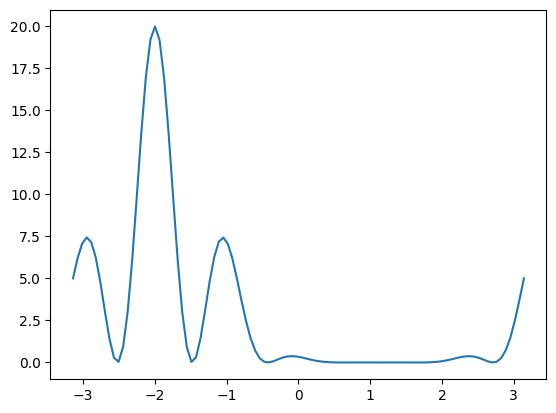

In [8]:
#plot example
ang = np.linspace(-np.pi,np.pi,100)
plt.plot(ang,getsignalstrength(ang,-2,0))

[[0.00161602 0.00103446 0.00161602]
 [0.00164748 0.00103855 0.00158493]
 [0.00167934 0.00104265 0.00155422]
 ...
 [0.00155422 0.00104265 0.00167934]
 [0.00158493 0.00103855 0.00164748]
 [0.00161602 0.00103446 0.00161602]]
[[-23.86373042 -30.1675352  -13.59734241]]
[0.57735027 0.57735027 0.57735027]


Text(0.5, 0, 'Angle / radians')

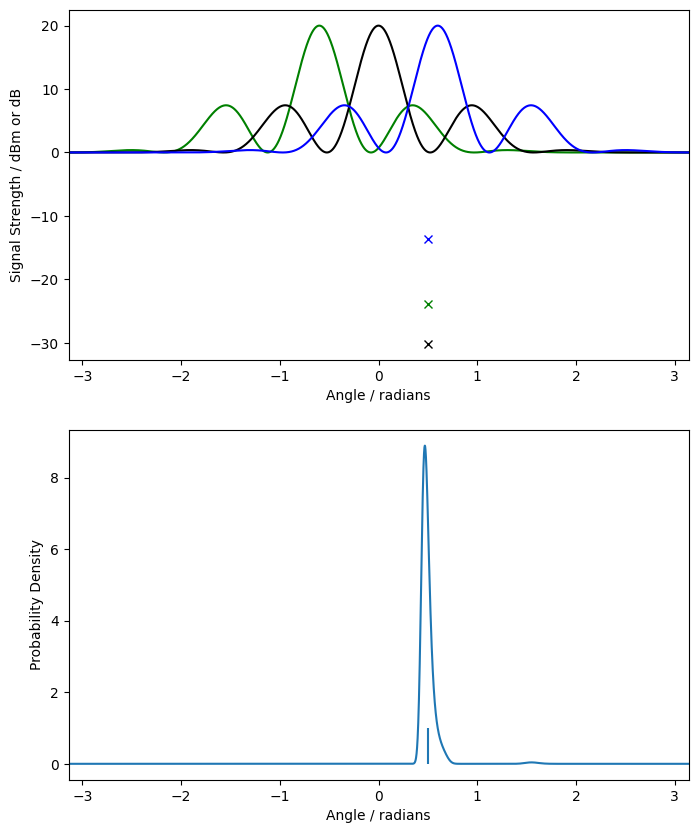

: 

In [12]:
plt.figure(figsize=[8,10])

#generate sythnetic noisy signal strength samples
true_ang = 0.5
noise_std = 2
signals = getsignalstrength(true_ang, np.array([-0.6,0,0.6]), 30)
signals+= noise_std*np.random.randn(3)

#store a unit vector facing along [1,1,1]
v = np.ones(3)/np.sqrt(3)

#we are going to search all angles (1000 steps)
ang = np.linspace(-np.pi,np.pi,10000)

#compute the noise-free expected signal strength for each angle (attenuation value doesn't matter, as 
#changing the attenuation will still lie on same [1,1,1] vector.
signal_mean_for_angle = getsignalstrength(ang, np.array([-0.6,0,0.6]), 0)
print(signal_mean_for_angle)
print(signals)
print(v)

#compute the distance from the [1,1,1] vector passing though each of the signal_mean_for_angle vectors
#from the measured signal vector of 3 measurements
dist = np.linalg.norm((v*((signals-signal_mean_for_angle)@v)[:,None]+signal_mean_for_angle)-signals,axis=1)

#compute the prob. density at this distance (for a normal distribution with standard deviation equal to
#the noise added to generate the signals
ps = norm(0,noise_std).pdf(dist)
#normalise
ps/=np.sum(ps)*(ang[1]-ang[0])

#plot
plt.subplot(2,1,1)
plt.plot(ang,signal_mean_for_angle[:,0],'g-')
plt.plot(ang,signal_mean_for_angle[:,1],'k-')
plt.plot(ang,signal_mean_for_angle[:,2],'b-')

plt.plot(true_ang,signals[0,0],'xg')
plt.plot(true_ang,signals[0,1],'xk')
plt.plot(true_ang,signals[0,2],'xb')

plt.xlabel('Angle / radians')
plt.ylabel('Signal Strength / dBm or dB')
plt.xlim([-np.pi,np.pi])
plt.subplot(2,1,2)
plt.plot(ang,ps)
plt.vlines(true_ang,0,1)
plt.xlim([-np.pi,np.pi])
plt.ylabel('Probability Density')
plt.xlabel('Angle / radians')
#first plot shows (lines) the antenna gain for different angles
#the crosses show the measured signal strengths (with attentuation)
#at the true angle

#second plot shows probability density
#vertical line shows true angle